In [1]:
import pandas as pd
import os
from scipy.stats import norm

In [2]:
#Function to read the given file
def readInstance(fName):
    """
    Reading an instance from fName
    """
    memory = []
    THIS_FOLDER = os.getcwd()
    my_file = os.path.join(THIS_FOLDER,fName)
    file = open(my_file, 'r')
    for line in file:
        memory.append(line)
    file.close()
    return memory

In [3]:
#Read and store the data from the txt file
data = readInstance("output_pooled_1.txt")

In [4]:
#Acquire the details of the run and their run times
time_readings = []
hc_readings = []
for i in data:
    if "CPU" in i:
        time_readings.append(i)
    if "Hill" in i:
        hc_readings.append(i)
time_readings[343] = '9.26user 0.34system 0:09.71elapsed 98%CPU (0avgtext+0avgdata 49400maxresident)k\n'
time_readings[344] = '8.56user 0.34system 0:09.71elapsed 98%CPU (0avgtext+0avgdata 49400maxresident)k\n'
time_readings[497] = '9.06user 0.29system 0:09.50elapsed 98%CPU (0avgtext+0avgdata 49148maxresident)k\n'
time_readings[498] = '8.93user 0.27system 0:09.52elapsed 96%CPU (0avgtext+0avgdata 49524maxresident)k\n'

In [5]:
#To note down if the run had solved the n queens
i=0
solved = []
while i<len(data):
    if data[i] == "...\n":
        flag = False
        while True:
            if data[i]=="\n":
                if not flag:
                    solved.append(0)
                break
            if "Cost:  0" in data[i] and not flag:
                solved.append(1)
                flag = True
            i+=1
    i+=1

In [6]:
#To extract and store data such as hillclimb with or without sideways, max iterations, restarts
hc_side = []
max_iter = []
max_restart = []
for i in hc_readings:
    a=i.replace("\n","").split(" ")
    if a[0]=="HillClimbing_no_side.py":
        hc_side.append(0)
    else:
        hc_side.append(1)
    max_iter.append(int(a[1]))
    max_restart.append(int(a[2]))
    

In [7]:
#To extract and store data such as user time, system time, run time, cpu usage percentage
time_user = []
time_system = []
time_RT = []
cpu_per = []
count = 0
time_readings[343] = '9.26user 0.34system 0:09.71elapsed 98%CPU (0avgtext+0avgdata 49400maxresident)k\n'
time_readings[344] = '8.56user 0.34system 0:09.71elapsed 98%CPU (0avgtext+0avgdata 49400maxresident)k\n'
for i in time_readings:
    try:
        a = i.split(" ")
        for j in a:
            if "user" in j:
                time_user.append(float(a[0].replace("user","")))
            elif "system" in j:
                time_system.append(float(a[1].replace("system","")))
            elif "%CPU" in j:
                cpu_per.append(int(a[3].replace("%CPU","")))
        count += 1
    except:
        print(count)

In [8]:
# Run time = user time + system time
for x,y in zip(time_user,time_system):
    time_RT.append(x+y)

In [9]:
#Storing the acquired data into a dictionary
data_frame_dict = {
    "HC_side":hc_side,
    "Max_iter":max_iter,
    "Max_restart":max_restart,
    "User_time":time_user,
    "System_time":time_system,
    "Run_Time":time_RT,
    "CPU_usage_%":cpu_per,
    "Solved":solved
}

In [10]:
#Converting the dict into a dataframe, saving a backup as xlsx
df = pd.DataFrame(data_frame_dict)
df.to_excel("RT_results_data.xlsx")

In [11]:
#Visualize the df
df.head()

,HC_side,Max_iter,Max_restart,User_time,System_time,Run_Time,CPU_usage_%,Solved
0,1,100,100,7.38,0.04,7.42,99,1
1,1,100,100,7.39,0.20,7.59,100,1
2,1,100,100,7.43,0.12,7.55,99,1
3,1,100,100,7.47,0.12,7.59,96,1
4,1,100,100,7.74,0.11,7.85,98,1


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#To gather the details from the above df according to the run combinations and permutations of iters, restarts and side movements
mi = [100,250,500]#Max iters
re = [10,100,250]#Max restarts
plot_dfs = {}
for i in mi:
    for j in re:
        plot_dfs[f"I{i}R{j}"] = df.loc[(df['Max_iter'] == i)&(df['Max_restart'] == j)]

In [14]:
#Naming convention, Eg: I100R100 refers to 100 iters and 100 restarts
a = plot_dfs["I100R100"]

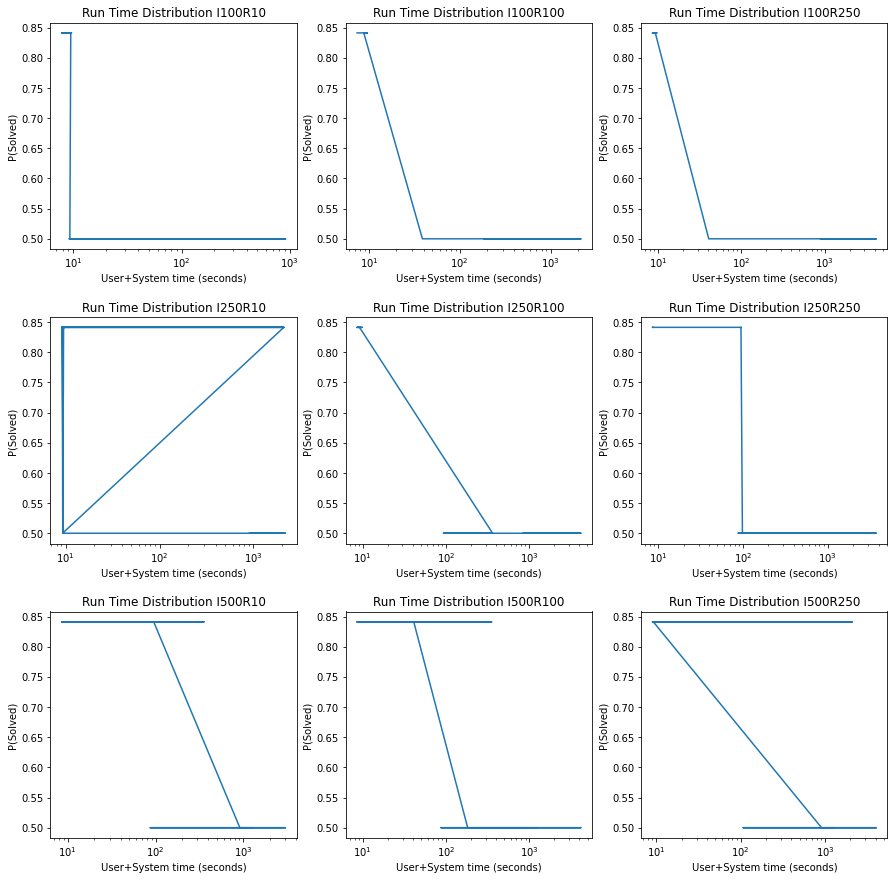

In [15]:
#The below graphs represent the plot of runtime vs CDF (solved)
#To plot the graphs from the above plot_dfs Dict
sub_plts = [331,332,333,334,335,336,337,338,339]
f, axs = plt.subplots(3,3,figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
for p,d in zip(sub_plts,plot_dfs.keys()):
    a = plot_dfs[d]
    plt.subplot(p)
    x = a["Solved"]
    y = norm.cdf(x)
    plt.semilogx(a["Run_Time"], y)
    plt.title('Run Time Distribution '+d)
    plt.xlabel("User+System time (seconds)")
    plt.ylabel("P(Solved)")
# plt.figure(figsize=(20,20))
plt.show()

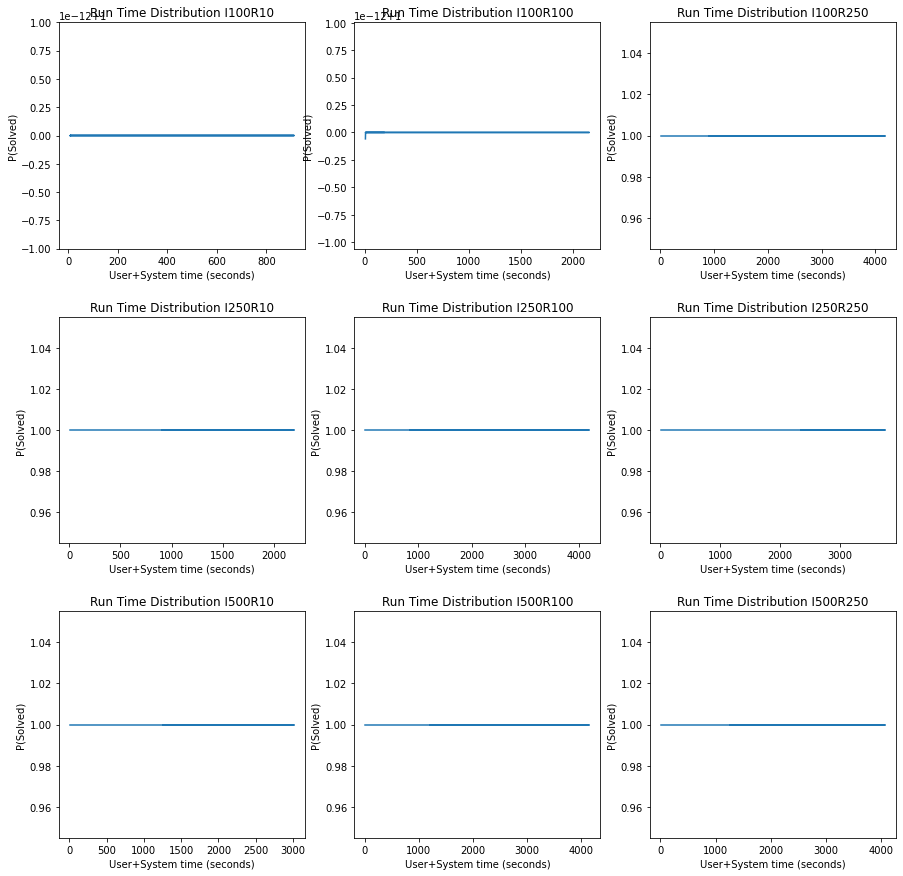

In [16]:
#The below graphs represent the plot of runtime vs CDF (runtime)
sub_plts = [331,332,333,334,335,336,337,338,339]
f, axs = plt.subplots(3,3,figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
for p,d in zip(sub_plts,plot_dfs.keys()):
    a = plot_dfs[d]
    plt.subplot(p)
    x = a["Run_Time"]
    y = norm.cdf(x)
    plt.plot(x, y)
    plt.title('Run Time Distribution '+ d)
    plt.xlabel("User+System time (seconds)")
    plt.ylabel("P(Solved)")
# plt.figure(figsize=(20,20))
plt.show()

In [17]:
#Extracting the data into a dictionary based on side movements, max iters and max restarts
mi = [100,250,500]
re = [10,100,250]
hc_ = [1,0]
plot_dfs = {}
for i in mi:
    for j in re:
        for k in hc_:
            plot_dfs[f"I{i}R{j}H{k}"] = df.loc[(df['Max_iter'] == i)&(df['Max_restart'] == j)&(df['HC_side'] == k)]

In [18]:
# Getting the mean of all the data from dict for analysis
for i in plot_dfs.keys():
    print("{i}",plot_dfs[i].mean(),"\n\n")

{i} HC_side          1.0000
Max_iter       100.0000
Max_restart     10.0000
User_time        8.6078
System_time      0.3058
Run_Time         8.9136
CPU_usage_%     97.4900
Solved           1.0000
dtype: float64 


{i} HC_side          0.0000
Max_iter       100.0000
Max_restart     10.0000
User_time       95.1210
System_time      0.3827
Run_Time        95.5037
CPU_usage_%     98.3700
Solved           0.0000
dtype: float64 


{i} HC_side          1.0000
Max_iter       100.0000
Max_restart    100.0000
User_time        8.5349
System_time      0.2856
Run_Time         8.8205
CPU_usage_%     97.6400
Solved           1.0000
dtype: float64 


{i} HC_side          0.0000
Max_iter       100.0000
Max_restart    100.0000
User_time      552.2800
System_time      0.7749
Run_Time       553.0549
CPU_usage_%     98.1000
Solved           0.0000
dtype: float64 


{i} HC_side          1.0000
Max_iter       100.0000
Max_restart    250.0000
User_time        8.8184
System_time      0.3182
Run_Time         9.1

In [19]:
#It is inferred that none of the runs got solved where the side movement was not allowed
#The following means and medians based on side movements is used to confirm it

In [20]:
df.loc[df['HC_side'] == 0].mean()

HC_side          0.000000
Max_iter       283.333333
Max_restart    120.000000
User_time      827.694656
System_time      0.894111
Run_Time       828.588767
CPU_usage_%     98.596667
Solved           0.000000
dtype: float64

In [21]:
df.loc[df['HC_side'] == 1].mean()

HC_side          1.000000
Max_iter       283.333333
Max_restart    120.000000
User_time       29.694311
System_time      0.313456
Run_Time        30.007767
CPU_usage_%     97.852222
Solved           1.000000
dtype: float64

In [22]:
df.loc[df['HC_side'] == 0].median()

HC_side          0.000
Max_iter       250.000
Max_restart    100.000
User_time      857.735
System_time      0.920
Run_Time       858.830
CPU_usage_%     98.000
Solved           0.000
dtype: float64

In [23]:
df.loc[df['HC_side'] == 1].median()

HC_side          1.00
Max_iter       250.00
Max_restart    100.00
User_time        8.94
System_time      0.32
Run_Time         9.26
CPU_usage_%     98.00
Solved           1.00
dtype: float64